In [1]:
import numpy as np
from skimage import io
from veg_index import Image_Multi
import matplotlib.pyplot as plt
from matplotlib import path
import matplotlib.patches as patches
import georasters as gr

from scipy import misc
import math
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
import Utils
import cv2

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
im_red_path = "Barrack A/result_Red.tif"
im_green_path = "Barrack A//result_Green.tif"
im_blue_path = "Barrack A/result_Blue.tif"
im_nir_path = "Barrack A/result_NIR.tif"
im_rededge_path = "Barrack A/result_RedEdge.tif"

im_multi = Image_Multi(im_red_path, im_green_path, im_blue_path, im_nir_path, im_rededge_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Polygon im_multi_seg: [(504, 6), (6, 1406), (3806, 3105), (2253, 492), (4614, 1566)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

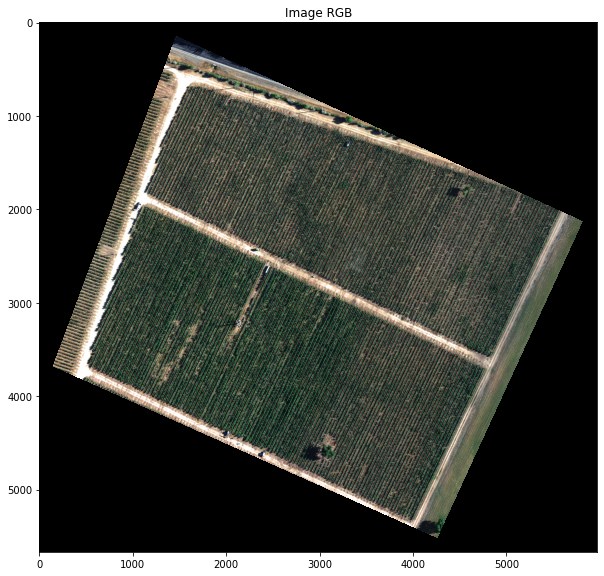

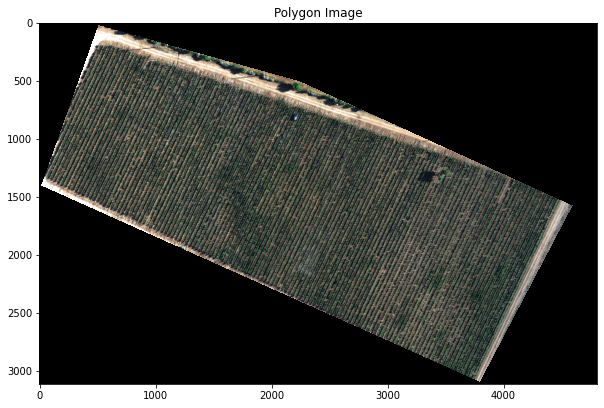

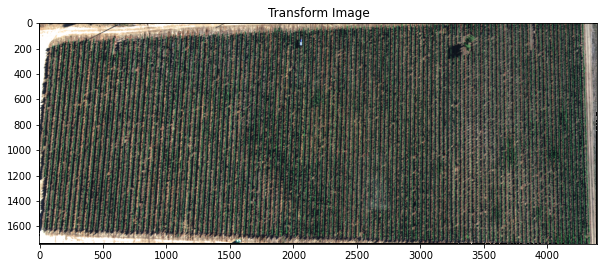

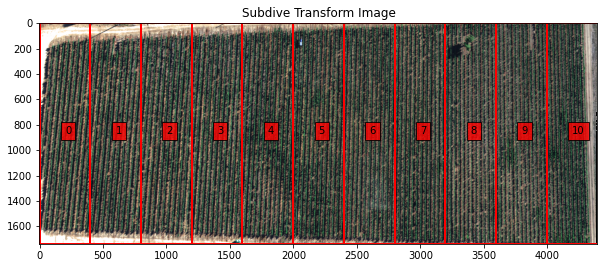

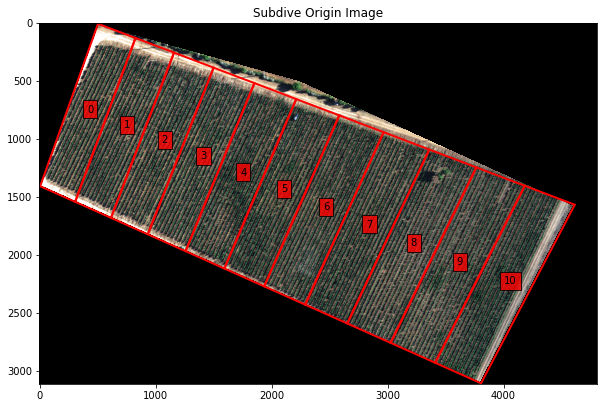

In [3]:
List_P = [(1600, 500),(4900, 3600), (1100, 1900), (5900, 1700)]
#List_P = [(500, 3700), (1000, 1900), (4900, 3500), (4000, 5500)]

im_multi_seg = im_multi.Segmentation(List_P)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.imshow(im_multi.RGB().raster)
plt.title( 'Image RGB')

plt.figure(1)
plt.figure(figsize=(10, 10))
plt.imshow(im_multi_seg.RGB().raster)
plt.title('Polygon Image')

print("Polygon im_multi_seg: " + str(im_multi_seg.list_P))


## Subidive image
Points = np.array(im_multi_seg.list_P)

M, maxWidth, maxHeight = Utils.perspectiveTransform(Points)

warped = cv2.warpPerspective(im_multi_seg.RGB().raster, M, (maxWidth, maxHeight))

plt.figure(2)
plt.figure(figsize=(10, 10))
plt.imshow(warped)
plt.title('Transform Image')

split_Weight, split_Height = 11, 1
sub_division = Utils.subdivision_rect([split_Weight, split_Height], maxWidth, maxHeight)

sub_division_origin = cv2.perspectiveTransform(np.array(sub_division), np.linalg.inv(M))

plt.figure(3)
plt.figure(figsize=(10, 10))
plt.imshow(warped)
plt.title('Subdive Transform Image')
ax = plt.gca()

for i,Poly in enumerate(sub_division):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in sub_division[i]]), np.mean([y[1]  for y in sub_division[i]]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)

############## Subidive in Origin Image ################

sub_division_origin = cv2.perspectiveTransform(np.array(sub_division), np.linalg.inv(M))


plt.figure(4)
plt.figure(figsize=(10, 10))
plt.imshow(im_multi_seg.RGB().raster)
plt.title('Subdive Origin Image')
ax = plt.gca()

for i,Poly in enumerate(sub_division_origin):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in sub_division_origin[i]]), np.mean([y[1]  for y in sub_division_origin[i]]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)



/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Polygon im_div: [(827, 128), (505, 5), (5, 1403), (306, 1540)]
[(827, 128), (505, 5), (5, 1403), (306, 1540)]


Text(0.5, 1.0, 'NDVI > 0.3')

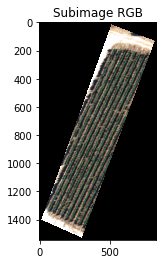

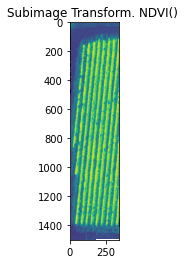

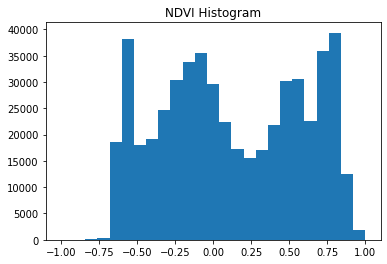

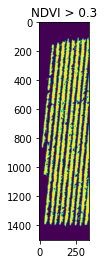

In [4]:
im_div = im_multi_seg.Segmentation(sub_division_origin[0])
print("Polygon im_div: " + str(im_div.list_P))

#### Transform ####
M, maxWidth, maxHeight = Utils.perspectiveTransform(np.array(im_div.list_P))
NDVI_raster = cv2.warpPerspective(im_div.NDVI().raster, M, (maxWidth, maxHeight))
#NDVI_raster = im_div.NDVI().raster.copy()


NDVI_raster = 2. * (NDVI_raster - np.nanmin(NDVI_raster)) / (np.nanmax(NDVI_raster) - np.nanmin(NDVI_raster))- 1
thershold = 0.3
NDVI_raster_th = NDVI_raster > thershold
NDVI_raster_resize = NDVI_raster_th#[2000: 4000, 2000: 4000]
NDVI_raster_bin = np.ones((NDVI_raster_resize.shape))*0
NDVI_raster_bin[NDVI_raster_resize == 1] = 255



plt.figure(0)
plt.imshow(im_div.RGB().raster)
plt.title('Subimage RGB')

plt.figure(1)
plt.imshow(NDVI_raster)
plt.title('Subimage Transform. NDVI() ')
print(im_div.list_P)

plt.figure(2)
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = 25)
plt.title('NDVI Histogram')

plt.figure(3)
plt.imshow(NDVI_raster_bin)
plt.title('NDVI > 0.3')




# CANNY Edge

<Figure size 432x288 with 0 Axes>

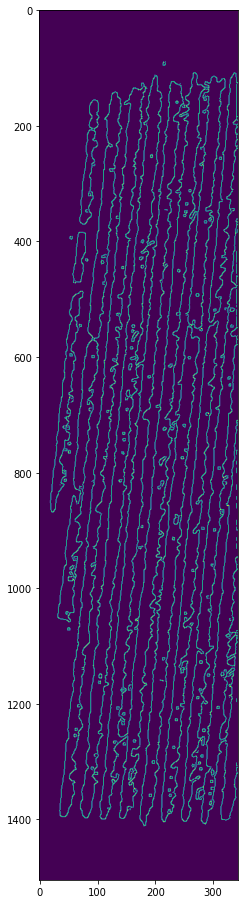

In [5]:


NDVI_raster_bin_copy = NDVI_raster_bin.copy()


low_threshold = 100
high_threshold = 150

kernel_size = 5
blur_gray = cv2.GaussianBlur(NDVI_raster_bin,(kernel_size, kernel_size),2)
edges = cv2.Canny(np.uint8(blur_gray),low_threshold, high_threshold,apertureSize = 3)

height,width = edges.shape
skel = np.zeros([height,width],dtype=np.uint8)      #[height,width,3]
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
temp_nonzero = np.count_nonzero(edges)

while (np.count_nonzero(edges) != 0 ):
    eroded = cv2.erode(edges,kernel)
    #cv2.imshow("eroded",eroded)   
    temp = cv2.dilate(eroded,kernel)
    #cv2.imshow("dilate",temp)
    temp = cv2.subtract(edges,temp)
    skel = cv2.bitwise_or(skel,temp)
    edges = eroded.copy()
    
plt.figure(2) 
plt.figure(figsize=(16, 16))
plt.imshow(skel)

(989, 1, 2)
(35, 1, 4)


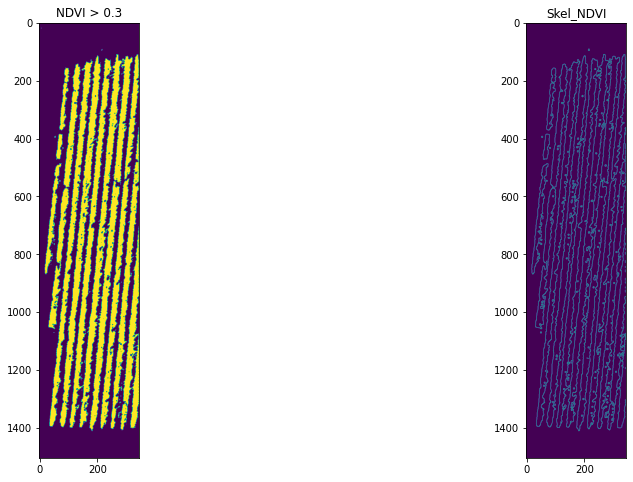

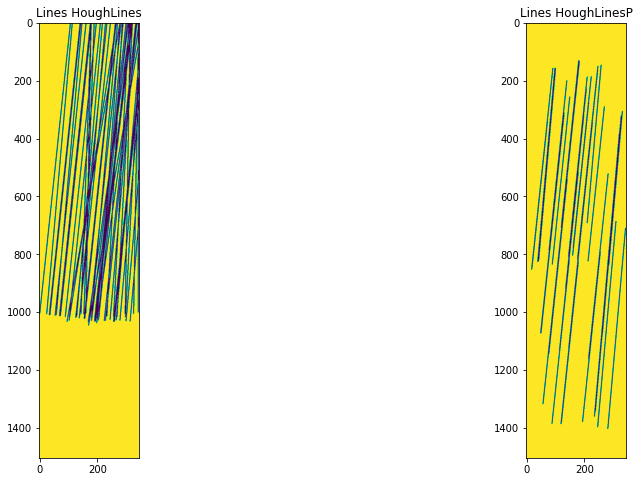

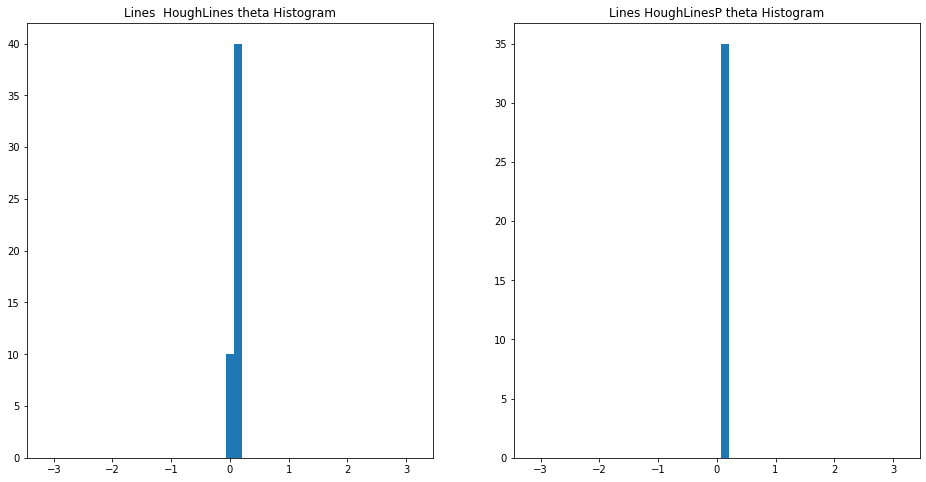

In [6]:

Z1 = np.ones((NDVI_raster_resize.shape))*255
Z2 = np.ones((NDVI_raster_resize.shape))*255

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 100  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 500  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments



lines = cv2.HoughLines(np.uint8(skel),rho, theta, threshold)
lines_P = cv2.HoughLinesP(np.uint8(skel),rho, theta, threshold, np.array([]) ,min_line_length, max_line_gap)

n_important = 50
theta_P = [np.pi/2 + np.arctan2(line[0][3] - line[0][1],line[0][2]-line[0][0])  for line in lines_P[:n_important]]


for line in lines[0:n_important]:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    #print((x1,y1,x2,y2))
    cv2.line(Z1,(x1,y1),(x2,y2),(0,0,255),2)
    
for line in lines_P[:n_important]:
    x1,y1,x2,y2 = line[0]
    cv2.line(Z2,(x1,y1),(x2,y2),(0,0,255),2)

    
    
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].imshow(NDVI_raster_bin) 
axs[0].title.set_text('NDVI > 0.3')

axs[1].imshow(skel)
axs[1].title.set_text('Skel_NDVI')

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].imshow(Z1)
axs[0].title.set_text('Lines HoughLines')

axs[1].imshow(Z2)
axs[1].title.set_text('Lines HoughLinesP')

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].hist(lines[0:n_important,0,1], bins = 45, range=[-np.pi,np.pi])
axs[0].title.set_text('Lines  HoughLines theta Histogram')


axs[1].hist(theta_P, bins = 45, range=[-np.pi,np.pi])
axs[1].title.set_text('Lines HoughLinesP theta Histogram')
print(lines.shape)
print(lines_P.shape)

In [7]:
from scipy.signal import argrelextrema

theta = lines[0:n_important,0,1]

h= np.histogram(np.array(theta), bins = 45, range=(-np.pi,np.pi))
peaks = argrelextrema(h[0], np.greater)

h_P = np.histogram(np.array(theta_P), bins = 45, range=(-np.pi,np.pi))
peaks_P = argrelextrema(h_P[0], np.greater)

theta_prop = (h[1][peaks] + h_P[1][peaks_P]) / 2

print(h[1][peaks])
print(h_P[1][peaks_P])
print(theta_prop)


[0.06981317]
[0.06981317]
[0.06981317]


/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


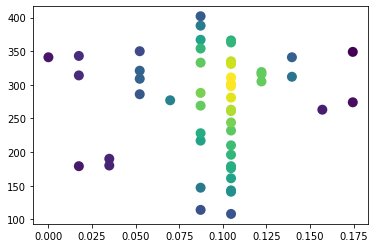

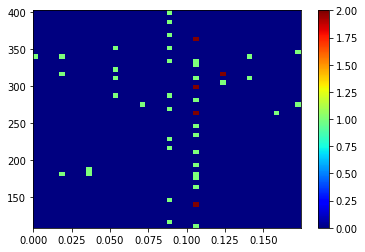

In [8]:
from scipy.stats import gaussian_kde
rho  = lines[0:50, 0,0]
theta = lines[0:50, 0,1]
xy = np.vstack([theta, rho])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
rho, theta, z = rho[idx], theta[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(theta, rho, c=z, s=100, edgecolor='')

plt.show()

plt.figure(2)
plt.hist2d(theta,rho,(50, 50), cmap=plt.cm.jet)

plt.colorbar() # show color scale

# Analisys total image

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


Text(0.5, 1.0, 'NDVI > 0.3')

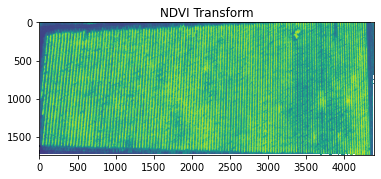

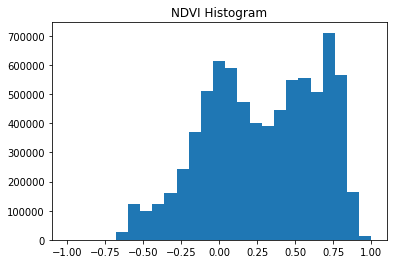

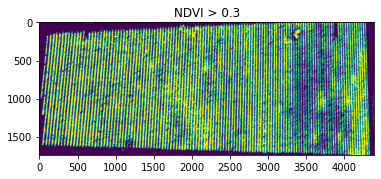

In [9]:

#### Transform ####
M, maxWidth, maxHeight = Utils.perspectiveTransform(np.array(im_multi_seg.list_P))
NDVI_raster = cv2.warpPerspective(im_multi_seg.NDVI().raster, M, (maxWidth, maxHeight))
#NDVI_raster = im_div.NDVI().raster.copy()

plt.figure(0)
plt.imshow(NDVI_raster)
plt.title("NDVI Transform")


NDVI_raster = 2. * (NDVI_raster - np.nanmin(NDVI_raster)) / (np.nanmax(NDVI_raster) - np.nanmin(NDVI_raster))- 1
thershold = 0.3
NDVI_raster_th = NDVI_raster > thershold
NDVI_raster_resize = NDVI_raster_th#[2000: 4000, 2000: 4000]
NDVI_raster_bin = np.ones((NDVI_raster_resize.shape))*0
NDVI_raster_bin[NDVI_raster_resize == 1] = 255

plt.figure(1)
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = 25)
plt.title('NDVI Histogram')

plt.figure(2)
plt.imshow(NDVI_raster_bin)
plt.title('NDVI > 0.3')




## Edges Lines

<Figure size 432x288 with 0 Axes>

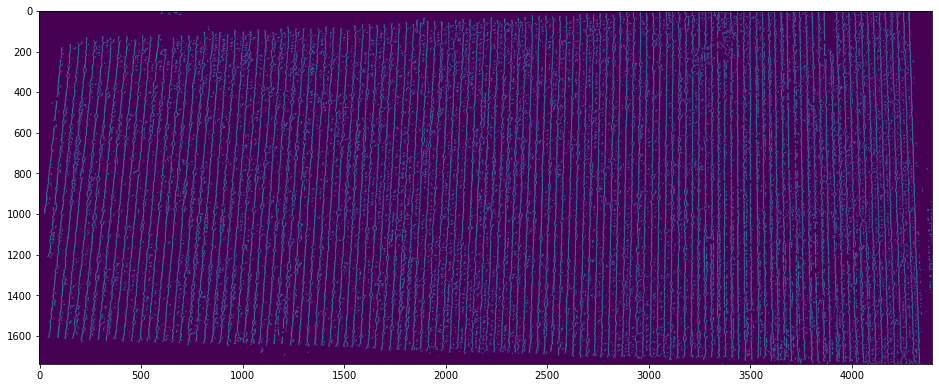

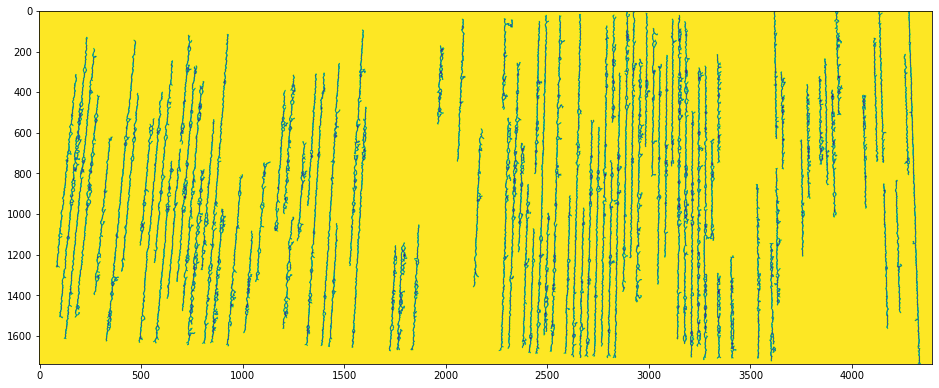

In [10]:
from scipy import ndimage

kernel_size = 3
edges = cv2.GaussianBlur((NDVI_raster_bin.copy()).astype(np.uint8),(kernel_size, kernel_size),0)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))
height,width = edges.shape
skel = np.zeros([height,width],dtype=np.uint8)      #[height,width,3]
temp_nonzero = np.count_nonzero(edges)

while (np.count_nonzero(edges) != 0 ):
    eroded = cv2.erode(edges,kernel)
    #cv2.imshow("eroded",eroded)   
    temp = cv2.dilate(eroded,kernel)
    #cv2.imshow("dilate",temp)
    temp = cv2.subtract(edges,temp)
    skel = cv2.bitwise_or(skel,temp)
    edges = eroded.copy()
    


n_important = 100
"""This function returns the count of labels in a mask image."""
label_im, nb_labels = ndimage.label(skel)#, structure= np.ones((2,2))) ## Label each connect region
label_areas = np.bincount(label_im.ravel())[1:]
keys_max_areas = np.array(sorted(range(len(label_areas)), key=lambda k: label_areas[k], reverse = True)) +1 
keys_max_areas = keys_max_areas[:n_important]
L = np.zeros(label_im.shape)
for i in keys_max_areas:
    L[label_im == i] = i 

labels = np.unique(L)
label_im = np.searchsorted(labels, L)

plt.figure(0) 
plt.figure(figsize=(16, 16))
plt.imshow(skel)
plt.figure(1)
plt.figure(figsize=(16, 16))
plt.imshow(label_im == 0)

## Hough Line

(44560, 1, 2)
(421, 1, 4)


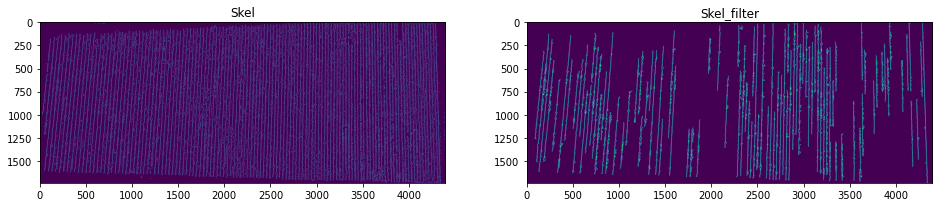

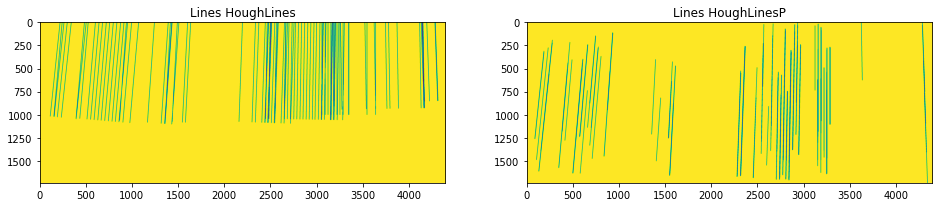

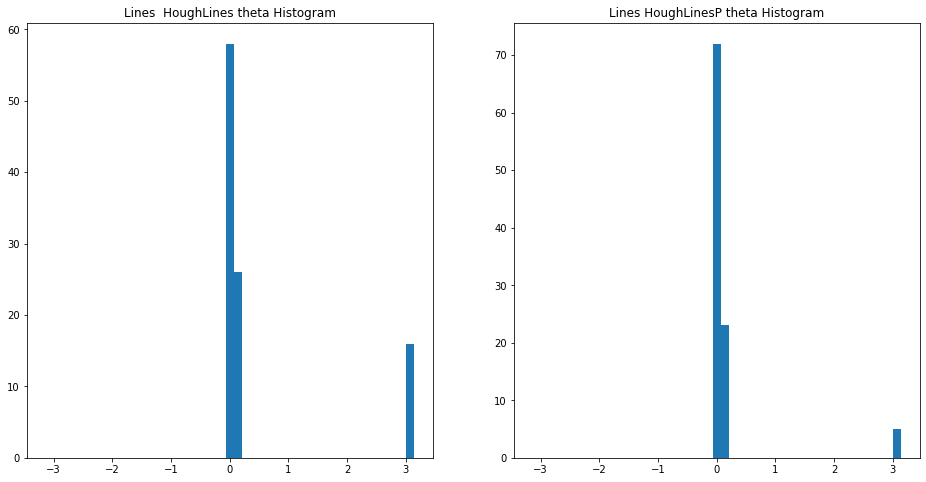

In [11]:

Z1 = np.ones((NDVI_raster_resize.shape))*255
Z2 = np.ones((NDVI_raster_resize.shape))*255

skel_filter = label_im>0

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 100  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 500  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments



lines = cv2.HoughLines(np.uint8(skel_filter),rho, theta, threshold)
lines_P = cv2.HoughLinesP(np.uint8(skel_filter),rho, theta, threshold, np.array([]) ,min_line_length, max_line_gap)

n_important = 100
theta_P = [np.pi/2 + np.arctan2(line[0][3] - line[0][1],line[0][2]-line[0][0])  for line in lines_P[:n_important]]


for line in lines[0:n_important]:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    #print((x1,y1,x2,y2))
    cv2.line(Z1,(x1,y1),(x2,y2),(0,0,255),2)
    
for line in lines_P[:n_important]:
    x1,y1,x2,y2 = line[0]
    cv2.line(Z2,(x1,y1),(x2,y2),(0,0,255),2)

    
    
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].imshow(skel) 
axs[0].title.set_text('Skel')

axs[1].imshow(skel_filter)
axs[1].title.set_text('Skel_filter')

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].imshow(Z1)
axs[0].title.set_text('Lines HoughLines')

axs[1].imshow(Z2)
axs[1].title.set_text('Lines HoughLinesP')

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].hist(lines[0:n_important,0,1], bins = 45, range=[-np.pi,np.pi])
axs[0].title.set_text('Lines  HoughLines theta Histogram')


axs[1].hist(theta_P, bins = 45, range=[-np.pi,np.pi])
axs[1].title.set_text('Lines HoughLinesP theta Histogram')
print(lines.shape)
print(lines_P.shape)

## Search inclinate angle

In [12]:

from scipy.signal import argrelextrema

theta = lines[0:n_important,0,1]

h= np.histogram(np.array(theta), bins = 45, range=(-np.pi,np.pi))
peaks = argrelextrema(h[0], np.greater)

h_P = np.histogram(np.array(theta_P), bins = 45, range=(-np.pi,np.pi))
peaks_P = argrelextrema(h_P[0], np.greater)

theta_prop = (h[1][peaks] + h_P[1][peaks_P]) / 2

print(h[1][peaks])
print(h_P[1][peaks_P])
print(theta_prop)

[-0.06981317]
[-0.06981317]
[-0.06981317]


## Rotate Polygon and subidivide

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Polygon im_multi_seg: [(601, 5), (5, 1366), (3677, 3328), (4721, 1640)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

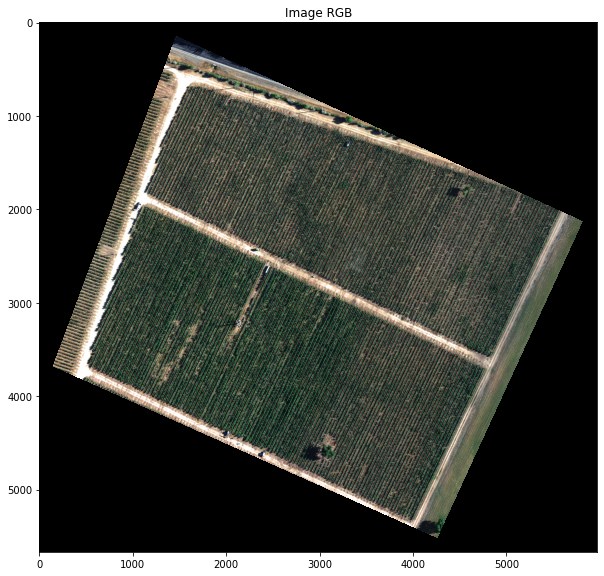

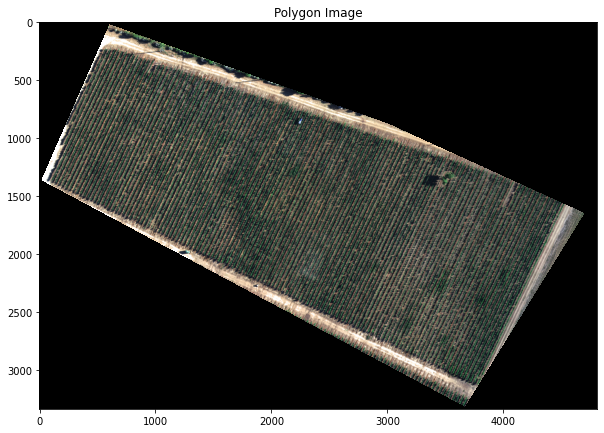

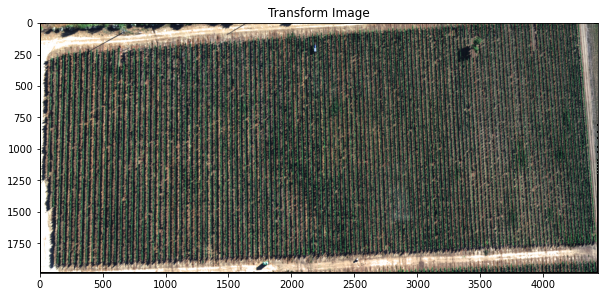

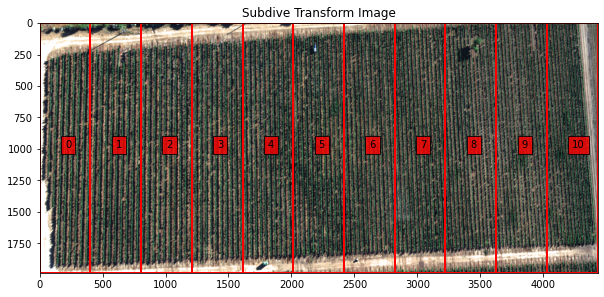

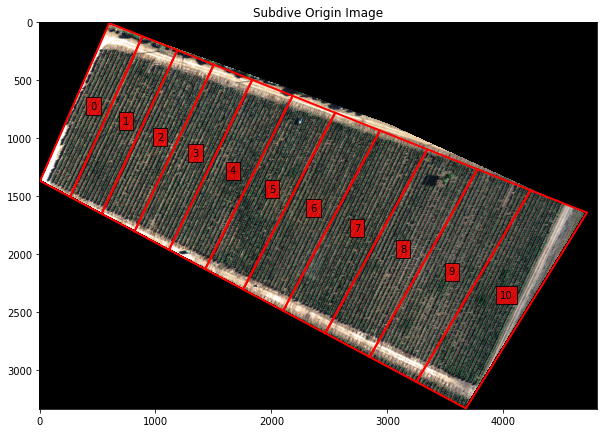

In [13]:
List_P = [(1600, 500),(4900, 3600), (1100, 1900), (5900, 1700)]
#List_P = [(500, 3700), (1000, 1900), (4900, 3500), (4000, 5500)]


center = (np.mean([point[0] for point in im_multi_seg.list_P]), np.mean([point[1] for point in im_multi_seg.list_P]))
matrix = cv2.getRotationMatrix2D( center=center, angle= theta_prop*180/np.pi, scale=1)

new_Points = cv2.transform(np.array([List_P]), matrix)[0]

im_multi_seg_new = im_multi.Segmentation(new_Points)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.imshow(im_multi.RGB().raster)
plt.title( 'Image RGB')

plt.figure(1)
plt.figure(figsize=(10, 10))
plt.imshow(im_multi_seg_new.RGB().raster)
plt.title('Polygon Image')

print("Polygon im_multi_seg: " + str(im_multi_seg_new.list_P))


## Subidive image
Points = np.array(im_multi_seg_new.list_P)

M, maxWidth, maxHeight = Utils.perspectiveTransform(Points)

warped = cv2.warpPerspective(im_multi_seg_new.RGB().raster, M, (maxWidth, maxHeight))

plt.figure(2)
plt.figure(figsize=(10, 10))
plt.imshow(warped)
plt.title('Transform Image')

split_Weight, split_Height = 11, 1
sub_division = Utils.subdivision_rect([split_Weight, split_Height], maxWidth, maxHeight)

sub_division_origin = cv2.perspectiveTransform(np.array(sub_division), np.linalg.inv(M))

plt.figure(3)
plt.figure(figsize=(10, 10))
plt.imshow(warped)
plt.title('Subdive Transform Image')
ax = plt.gca()

for i,Poly in enumerate(sub_division):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in sub_division[i]]), np.mean([y[1]  for y in sub_division[i]]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)

############## Subidive in Origin Image ################

sub_division_origin = cv2.perspectiveTransform(np.array(sub_division), np.linalg.inv(M))


plt.figure(4)
plt.figure(figsize=(10, 10))
plt.imshow(im_multi_seg_new.RGB().raster)
plt.title('Subdive Origin Image')
ax = plt.gca()

for i,Poly in enumerate(sub_division_origin):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in sub_division_origin[i]]), np.mean([y[1]  for y in sub_division_origin[i]]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)



In [14]:
print([im_multi_seg.list_P])
print(new_Points)

[[(504, 6), (6, 1406), (3806, 3105), (2253, 492), (4614, 1566)]]
[[1658  458]
 [4734 3780]
 [1062 1819]
 [5864 1955]]


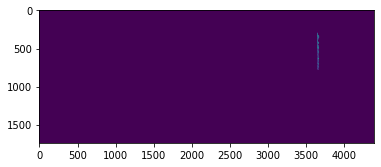

In [15]:
plt.imshow(label_im ==40)